In [1]:
import tensorflow as tf

/Users/Linh-Main/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# placeholders (to inject data into the model)
data = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

sizes = [784,40,56,10]
depth = len(sizes)-1


W = []
b = []
#Initilize the paras
for m,n in zip(sizes[:-1],sizes[1:]):
    W.append(tf.Variable(tf.random_normal([m,n],stddev=1./m)))
    b.append(tf.Variable(tf.zeros(n)))
                    
# Generate the flow
out = tf.add(tf.matmul(data,W[0]),b[0])
for i in range(1,depth):
    out = tf.add(tf.matmul(tf.nn.relu(out),W[i]),b[i])
    
logits = out    

cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=labels,logits = logits)
    
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(labels,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    

In [6]:
def train():
    import sys
    learning_rate = 0.5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # define log variables
    cross_entropy_train, cross_entropy_test = [], []
    accuracy_train, accuracy_test = [], []
    iteration = []

    for _ in range(4000):
        if _ % 100 == 0:
        #calculate metrics
            cross_entropy_train_ = sess.run(cross_entropy, 
                                       feed_dict={data:mnist.train.images, 
                                                  labels:mnist.train.labels})
            cross_entropy_test_ = sess.run(cross_entropy, 
                               feed_dict={data:mnist.test.images, 
                                          labels:mnist.test.labels})
            accuracy_train_ = sess.run(accuracy, 
                 feed_dict={data: mnist.train.images, 
                            labels: mnist.train.labels})
            accuracy_test_ = sess.run(accuracy, 
                                 feed_dict={data: mnist.test.images, 
                                            labels: mnist.test.labels})
        # log metrics
            cross_entropy_train.append(cross_entropy_train_)
            cross_entropy_test.append(cross_entropy_test_)
            accuracy_train.append(accuracy_train_)
            accuracy_test.append(accuracy_test_)
            iteration.append(_)
            
        # show something
            if _ % 100 == 0:
                sys.stdout.write('\r for iteration {} accuracy_test is {}'.format(_,accuracy_test[-1]))
            
    # train the model
        batch_xs, batch_ys = mnist.train.next_batch(64)
        sess.run(train_op, feed_dict={data: batch_xs, labels: batch_ys})
        
    import matplotlib.pyplot as plt
    plt.title('learning curve (accuracy)')
    plt.plot(iteration, accuracy_train)
    plt.plot(iteration, accuracy_test)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.show()
    
    plt.title('learning curve (cross_entropy)')
    plt.plot(iteration, cross_entropy_train)
    plt.plot(iteration, cross_entropy_test)
    plt.xlabel('iteration')
    plt.ylabel('loss/cost')
    plt.show()
    sess.close()



 for iteration 3900 accuracy_test is 0.9659000039100647

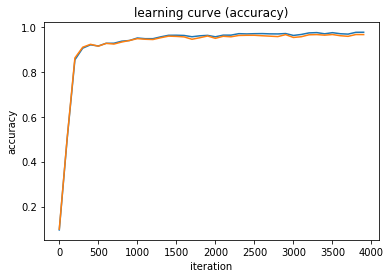

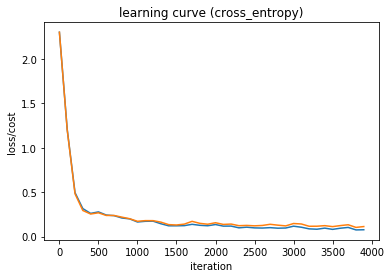

CPU times: user 48.1 s, sys: 15 s, total: 1min 3s
Wall time: 22.7 s


In [8]:
%%time 
train()